# NYPD Calls for Service - Data Cleaning and EDA 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [5]:
# Current working directory
os.getcwd()

'/Users/dirkhartog/Desktop/CUNY_MSDS/DATA_698'

In [7]:
full_call_data = pd.read_csv("/Users/dirkhartog/Desktop/CUNY_MSDS/DATA_698/Data/df_combined.csv", 
                                parse_dates = ["create_date", "incident_date", "incident_time",
                                               "disp_ts", "arrivd_ts"])

In [9]:
full_call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25164780 entries, 0 to 25164779
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Unnamed: 0     float64       
 1   cad_evnt_id    int64         
 2   create_date    datetime64[ns]
 3   incident_date  datetime64[ns]
 4   incident_time  datetime64[ns]
 5   nypd_pct_cd    float64       
 6   boro_nm        object        
 7   patrl_boro_nm  object        
 8   typ_desc       object        
 9   cip_jobs       object        
 10  disp_ts        datetime64[ns]
 11  arrivd_ts      datetime64[ns]
 12  closng_ts      object        
 13  location       object        
dtypes: datetime64[ns](5), float64(2), int64(1), object(6)
memory usage: 2.6+ GB


In [11]:
# Get the number unique dates
full_call_data["create_date"].nunique()

1277

In [13]:
# Inspect missing values in each column 
full_call_data.isna().sum()

Unnamed: 0        3527523
cad_evnt_id             0
create_date             0
incident_date           0
incident_time           0
nypd_pct_cd            13
boro_nm                 0
patrl_boro_nm           0
typ_desc                0
cip_jobs                0
disp_ts                 1
arrivd_ts        11125146
closng_ts             148
location                0
dtype: int64

In [15]:
# Drop Unnamed column
full_call_data.drop(columns="Unnamed: 0", inplace = True)

### "boro_nm"

In [16]:
full_call_data["boro_nm"].unique()

array(['STATEN ISLAND', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX',
       '(null)'], dtype=object)

Missing boro data recorded as null, how many of those observations are there?

In [20]:
missing_boro = full_call_data[full_call_data["boro_nm"] == "(null)"]
missing_boro.shape

(23801, 13)

In [22]:
# Find number of cip jobs 
missing_boro["cip_jobs"].value_counts()

cip_jobs
Non CIP         22051
Non Critical      862
Serious           487
Critical          401
Name: count, dtype: int64

Most of the observations missing a boro name list non crimes in progress (Non CIP). Next, look tosee if any of these observations have a precinct listed. 

In [25]:
# precincts where there are missing values
missing_boro["nypd_pct_cd"].value_counts()

nypd_pct_cd
116.0    23267
0.0        521
Name: count, dtype: int64

Observations with missing boroughs either list no precinct or the 116th precinct. Doing some research the 116th precinct is part of Queens. The 116th precinct was created in 2024 to off load the demand of neighboring precincts 105th and the 113th. 

Next steps: Investigate the missing borough observations that list the 116th precinct

In [28]:
precinct_116 = missing_boro[missing_boro["nypd_pct_cd"] == 116]
precinct_116.head(15)

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,typ_desc,cip_jobs,disp_ts,arrivd_ts,closng_ts,location
21637257,108642792,2025-01-01,2024-12-31,2025-10-07 23:22:32,116.0,(null),(null),VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,2025-01-01 00:45:19,2025-01-01 01:21:05,2025-01-01 01:21:07,"-73.73913314899994, 40.66189404600004"
21637430,108643425,2025-01-01,2025-01-01,2025-10-07 00:19:17,116.0,(null),(null),SEE COMPLAINANT: OTHER/OUTSIDE,Non CIP,2025-01-01 00:19:18,NaT,2025-01-01 00:26:54,"-73.74009069399993, 40.66313411500005"
21637546,108643557,2025-01-01,2025-01-01,2025-10-07 00:27:07,116.0,(null),(null),SEE COMPLAINANT: OTHER/INSIDE,Non CIP,2025-01-01 00:27:11,NaT,2025-01-01 00:39:53,"-73.75159392099994, 40.65696453600003"
21637562,108643574,2025-01-01,2025-01-01,2025-10-07 00:27:57,116.0,(null),(null),VISIBILITY PATROL: DIRECTED,Non CIP,2025-01-01 00:27:59,2025-01-01 00:28:06,2025-01-01 00:55:13,"-73.76845041899996, 40.66425143900005"
21637673,108643703,2025-01-01,2025-01-01,2025-10-07 00:36:40,116.0,(null),(null),TRAFFIC SAFETY,Non CIP,2025-01-01 00:36:43,2025-01-01 00:36:44,2025-01-01 02:36:14,"-73.74633411599996, 40.67817576800008"
21637820,108643861,2025-01-01,2025-01-01,2025-10-07 00:48:08,116.0,(null),(null),SEE COMPLAINANT: OTHER/OUTSIDE,Non CIP,2025-01-01 00:48:10,NaT,2025-01-01 01:01:02,"-73.74935397299998, 40.66127449000004"
21637912,108643961,2025-01-01,2025-01-01,2025-10-07 00:54:49,116.0,(null),(null),INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER,Non CIP,2025-01-01 01:05:57,2025-01-01 01:06:01,2025-01-01 01:12:12,"-73.72917460199993, 40.68309374300002"
21637929,108643978,2025-01-01,2025-01-01,2025-10-07 00:56:03,116.0,(null),(null),INVESTIGATE/POSSIBLE CRIME: SHOTS FIRED/OUTSIDE,Critical,2025-01-01 00:56:04,2025-01-01 00:56:49,2025-01-01 01:09:11,"-73.73819475699997, 40.66312981600004"
21638038,108644096,2025-01-01,2025-01-01,2025-10-07 01:02:39,116.0,(null),(null),INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/OUTSIDE,Non CIP,2025-01-01 01:02:39,2025-01-01 01:02:39,2025-01-01 01:12:43,"-73.76418193799998, 40.67159056500003"
21638076,108644137,2025-01-01,2025-01-01,2025-10-07 01:04:38,116.0,(null),(null),VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,2025-01-01 01:16:40,2025-01-01 01:28:45,2025-01-01 03:03:06,"-73.75194007899995, 40.68599964600003"


In [30]:
# What do other observations that list the 116th precinct use as boro_nm and patrl_boro_nm

# unique borough name 
print(full_call_data[full_call_data["nypd_pct_cd"] == 116]["boro_nm"].unique())

# Unique patrol boro name 
print(full_call_data[full_call_data["nypd_pct_cd"] == 116]["patrl_boro_nm"].unique())

['QUEENS' '(null)']
['PATROL BORO QUEENS SOUTH' '(null)']


In [32]:
# Fill in the missing boro_name and patrol name in the observations that list 116th as the precinct 

# precinct_116 - contains the observations that have the precinct listed but no boro/patrol boro

index_to_change = precinct_116.index

full_call_data.loc[index_to_change, ["boro_nm", "patrl_boro_nm"]] = ["QUEENS", "PATROL BORO QUEENS SOUTH"]

In [34]:
# Re - check that the values are filled in
full_call_data[(full_call_data["boro_nm"] == "(null)") &
              (full_call_data["nypd_pct_cd"] == 116)].shape

(0, 13)

In [36]:
# Re assign missing boro data
missing_boro = full_call_data[full_call_data["boro_nm"] == "(null)"]
missing_boro.shape

(534, 13)

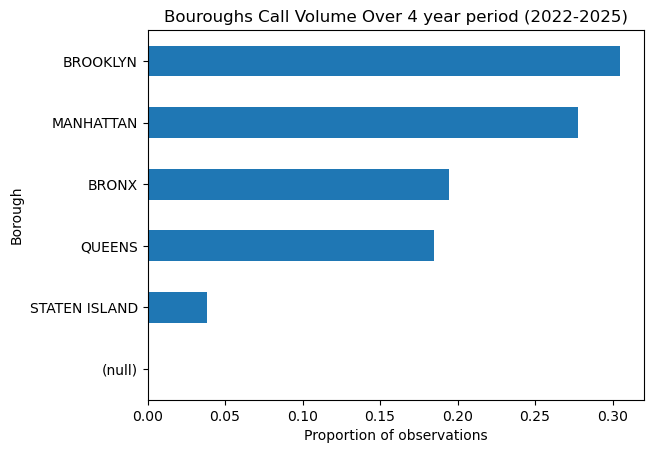

In [38]:
# Get the proportion of calls in each neighborhoods

full_call_data["boro_nm"].value_counts(normalize = True, dropna = True).sort_values().plot(kind = "barh")
plt.title("Bouroughs Call Volume Over 4 year period (2022-2025)")
plt.ylabel("Borough")
plt.xlabel("Proportion of observations")
plt.show()

In [40]:
# Check location coordinates
missing_boro["location"].isna().sum()

0

Location coordinates are available so plotting them based on location would reveal their location 

In [43]:
# Check the the number of missing arrive times 

missing_boro["arrivd_ts"].isna().sum()

288

### "cip_jobs"

In [45]:
# Crime calls 

full_call_data["cip_jobs"].unique()

array(['Non CIP', 'Serious', 'Non Critical', 'Critical'], dtype=object)

In [47]:
full_call_data["cip_jobs"].value_counts()

cip_jobs
Non CIP         23393666
Non Critical      899731
Serious           569516
Critical          301867
Name: count, dtype: int64

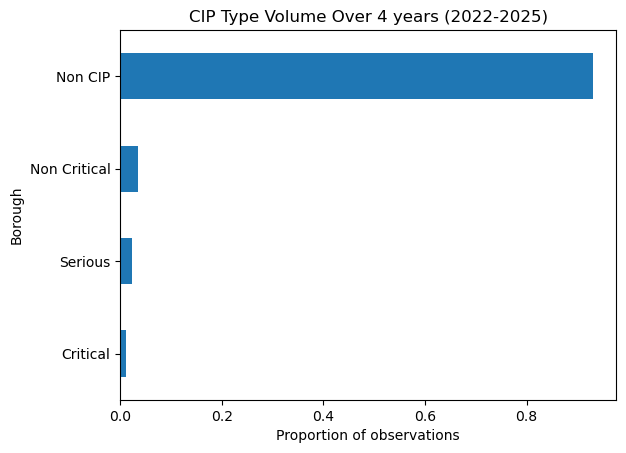

In [49]:
# Plot the proportion of cip jobs 

full_call_data["cip_jobs"].value_counts(normalize = True).sort_values().plot(kind = "barh")
plt.title("CIP Type Volume Over 4 years (2022-2025)")
plt.ylabel("Call category")
plt.xlabel("Proportion of observations")
plt.show()

The majority of calls are considered Non CIP - non crimes in progress. 

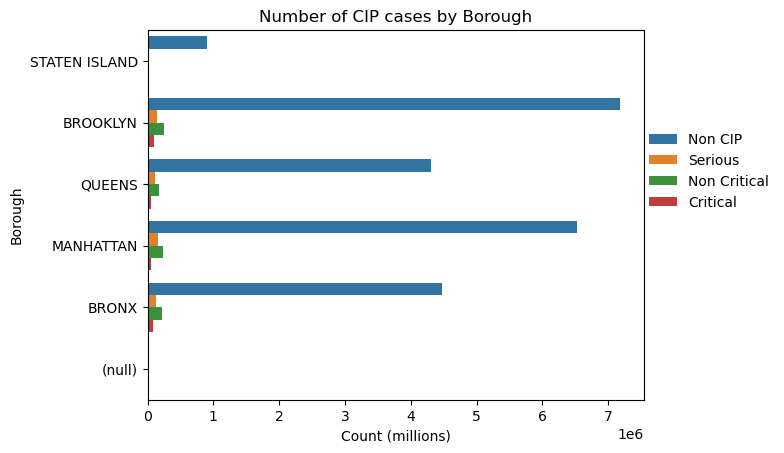

In [54]:
# Visualize this by borough 

sns.countplot(full_call_data, y = "boro_nm", hue = "cip_jobs")
plt.title("Number of CIP cases by Borough")
plt.xlabel("Count (millions)")
plt.ylabel("Borough")
plt.legend(loc = (1, 0.5), frameon = False)
plt.show()

#### cip_jobs - unique typ_desc

In [74]:
# Unique descriptions within each CIP category - create dataframe
cip_desc = full_call_data.groupby("cip_jobs", as_index = False)["typ_desc"].unique()
cip_desc = cip_desc.explode("typ_desc")
cip_desc.reset_index(inplace = True, drop=True)

# Save dataframe
cip_desc.to_csv('/Users/dirkhartog/Desktop/CUNY_MSDS/DATA_698/Data/df_cip_dsec.csv')
cip_desc.head(10)

,cip_jobs,typ_desc
0,Critical,ASSAULT (IN PROGRESS): KNIFE/OUTSIDE
1,Critical,ASSIST POLICE OFFICER: UNIFORM/INSIDE
2,Critical,BURGLARY (IN PROGRESS): OTHER
3,Critical,BURGLARY (IN PROGRESS): RESIDENCE
4,Critical,SHOT SPOTTER
5,Critical,ASSAULT (IN PROGRESS): KNIFE/INSIDE
6,Critical,ASSIST POLICE OFFICER: UNKNOWN/TRANSIT
7,Critical,ASSAULT (IN PROGRESS): KNIFE/FAMILY
8,Critical,ASSAULT (IN PROGRESS): WEAPON/OUTSIDE
9,Critical,ASSAULT (IN PROGRESS): WEAPON/FAMILY


### Extracting temporal components

#### "year"

In [59]:
# Create a year column with the year from create_date

full_call_data["year"] = full_call_data["incident_date"].dt.year

In [61]:
# Number of observations each year 
full_call_data["year"].value_counts()

year
2022    7398472
2024    7186107
2023    7052680
2025    3527521
Name: count, dtype: int64

### "arrivd_ts"

In [64]:
# Look at the missing values for each year of the arrived time

full_call_data[full_call_data["arrivd_ts"].isna()]["year"].value_counts()

year
2022    7398469
2024    1510644
2023    1503654
2025     712379
Name: count, dtype: int64

There is no data on the arrival time for the year 2022. About equal amount of observations are missing arrival times for 2023 and 2024. Almost 50% of the data set is missing an arrival time (Total observations missing arrival time: 10,412,767). 

In [67]:
# Look at the arrival time
## Look at the make up of the observations with an arrivd_ts

full_call_data[full_call_data["arrivd_ts"].isna()]["cip_jobs"].value_counts(normalize = True)

cip_jobs
Non CIP         0.942650
Non Critical    0.029541
Serious         0.017793
Critical        0.010016
Name: proportion, dtype: float64

Of the observations missing an arrival time > 90% are Non CIP

### "response_time"

In [70]:
# Create a column "response" time - amount of time it took to arrive after after the dispatch

full_call_data["response_time"] = full_call_data["arrivd_ts"] - full_call_data["disp_ts"]

In [72]:
full_call_data["response_time"][0:10]

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: response_time, dtype: timedelta64[ns]

In [74]:
response_time = []

for t in full_call_data["response_time"]:
    if t == "NaT":
        response_time.append(t)
    else:
        total_sec = t.total_seconds()
        response_time.append(total_sec/60)

In [78]:
# Create new column with converted response time
full_call_data["response_time_mins"] = response_time



In [80]:
# As a proxy for importance can we use the mean arrival time of each type of cip_jobs
## Get summary stats response time for each CIP Type for each year for each boro
full_call_data.groupby(["year", "boro_nm", "cip_jobs"], as_index=False).agg(response_min = ("response_time_mins", "min"),
                                                               response_max = ("response_time_mins", "max"),
                                                               response_mean = ("response_time_mins", "mean"),
                                                               response_sd = ("response_time_mins", "std"))

,year,boro_nm,cip_jobs,response_min,response_max,response_mean,response_sd
0,2022,(null),Non CIP,NaN,NaN,NaN,NaN
1,2022,(null),Non Critical,NaN,NaN,NaN,NaN
2,2022,(null),Serious,NaN,NaN,NaN,NaN
3,2022,BRONX,Critical,NaN,NaN,NaN,NaN
4,2022,BRONX,Non CIP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
83,2025,QUEENS,Serious,0.0,448.016667,7.645378,15.347337
84,2025,STATEN ISLAND,Critical,0.0,149.600000,4.623364,7.548004
85,2025,STATEN ISLAND,Non CIP,0.0,647.783333,11.419513,33.924743
86,2025,STATEN ISLAND,Non Critical,0.0,333.566667,9.381482,17.585921


<Axes: xlabel='boro_nm', ylabel='response_time_mins'>

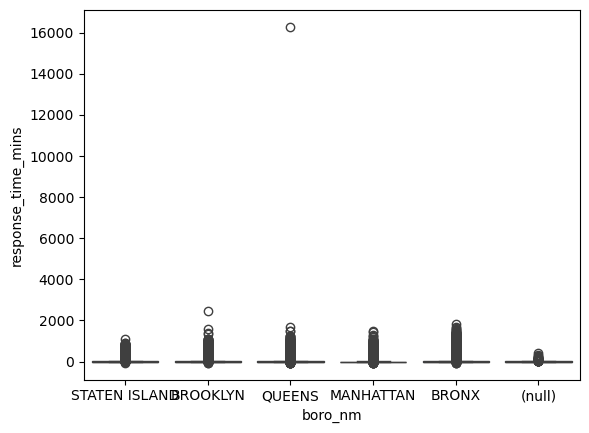

In [115]:
# Glance at the distribution of response time

sns.boxplot(full_call_data, x = "boro_nm", y = "response_time_mins")

In [82]:
full_call_data[full_call_data["response_time_mins"] == full_call_data["response_time_mins"].max()]

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,typ_desc,cip_jobs,disp_ts,arrivd_ts,closng_ts,location,year,response_time,response_time_mins
9900313,94265723,2023-05-04,2023-05-04,2025-10-06 18:00:21,109.0,QUEENS,PATROL BORO QUEENS NORTH,INVESTIGATE/POSSIBLE CRIME: SUSP PERSON/INSIDE...,Non CIP,2023-05-04 18:00:50,2023-05-16 01:24:17,2023-05-16 09:21:59,POINT (-73.84681896699993 40.78245940900007),2023,11 days 07:23:27,16283.45


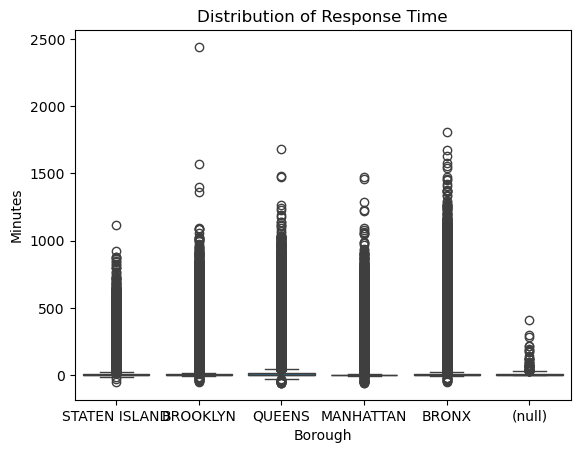

In [84]:
sns.boxplot(full_call_data.drop(index = 9900313), x = "boro_nm", y = "response_time_mins")
plt.title("Distribution of Response Time")
plt.xlabel("Borough")
plt.ylabel("Minutes")
plt.show()

In [86]:
# Find all observations where the response time is < 0 
# - Indicates the arrival time is earlier than the dispatch time - 

# full_call_data[full_call_data["response_time_mins"] < 0]

### Create "hour" and "day" column

In [121]:
# hour column 
full_call_data["hour"] = full_call_data["incident_time"].dt.hour
full_call_data["day"] = full_call_data["incident_date"].dt.day_name()
full_call_data["day_num"] = full_call_data["incident_date"].dt.weekday

In [123]:
full_call_data["day"].value_counts()

day
Friday       3712171
Thursday     3656774
Wednesday    3649815
Tuesday      3613950
Saturday     3601920
Monday       3465752
Sunday       3464398
Name: count, dtype: int64

In [125]:
weekly_hour_counts = full_call_data[full_call_data["year"].isin([2022,2023,2024])].groupby(["day", "day_num", "hour"], as_index = False).agg(
    total_count = ("incident_date", "count")
)
weekly_hour_counts.head()

,day,day_num,hour,total_count
0,Friday,4,0,139576
1,Friday,4,1,122357
2,Friday,4,2,96310
3,Friday,4,3,75970
4,Friday,4,4,67364


In [127]:
weekly_hour_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          168 non-null    object
 1   day_num      168 non-null    int32 
 2   hour         168 non-null    int32 
 3   total_count  168 non-null    int64 
dtypes: int32(2), int64(1), object(1)
memory usage: 4.1+ KB


In [129]:
weekly_hour_counts["index_hour"] = weekly_hour_counts.index
weekly_hour_counts["avg_count"] = weekly_hour_counts["total_count"] / 3

In [135]:
weekly_hour_counts.sort_values(["day_num", "index_hour"], ascending = True, inplace= True)

weekly_hour_counts.reset_index(inplace = True, drop=True)
weekly_hour_counts["index_hour"] = weekly_hour_counts.index

weekly_hour_counts.head()

,day,day_num,hour,total_count,index_hour,avg_count
0,Monday,0,0,141374,0,47124.666667
1,Monday,0,1,121197,1,40399.000000
2,Monday,0,2,93576,2,31192.000000
3,Monday,0,3,72580,3,24193.333333
4,Monday,0,4,65484,4,21828.000000


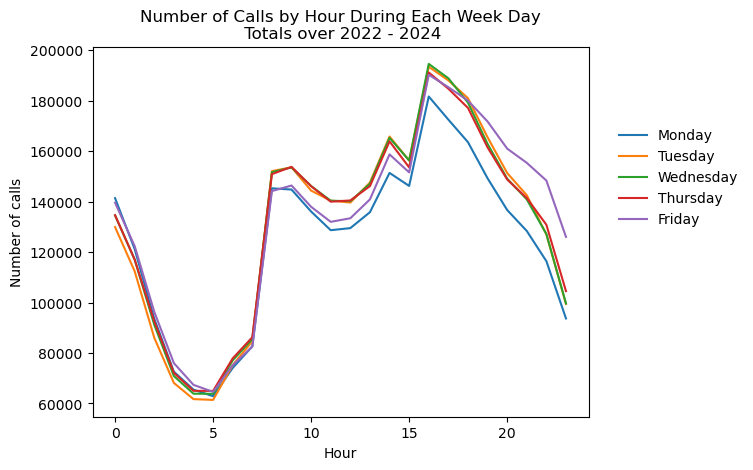

In [137]:
sns.lineplot(weekly_hour_counts[weekly_hour_counts["day"].isin(["Monday","Tuesday","Wednesday","Thursday", "Friday"])], 
             x = "hour", y = "total_count", hue = "day")
plt.title("Number of Calls by Hour During Each Week Day\n Totals over 2022 - 2024")
plt.xlabel("Hour")
plt.ylabel("Number of calls")
plt.legend(loc = (1.05,0.5), frameon = False)
plt.show()

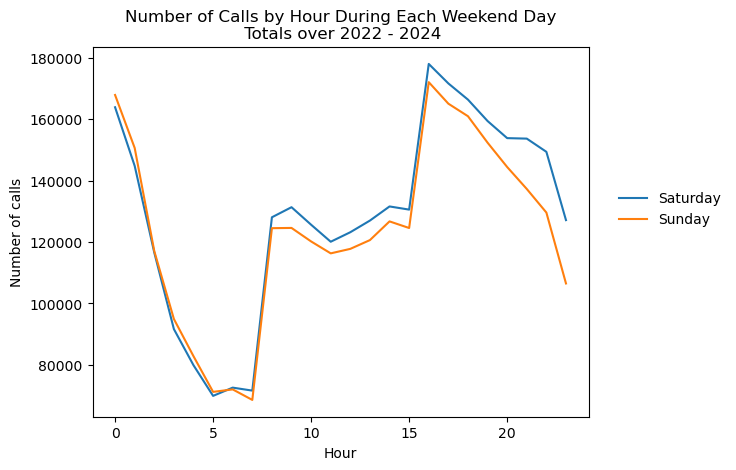

In [139]:
sns.lineplot(weekly_hour_counts[weekly_hour_counts["day"].isin(["Saturday","Sunday"])], 
             x = "hour", y = "total_count", hue = "day")
plt.title("Number of Calls by Hour During Each Weekend Day\n Totals over 2022 - 2024")
plt.xlabel("Hour")
plt.ylabel("Number of calls")
plt.legend(loc = (1.05,0.5), frameon = False)
plt.show()

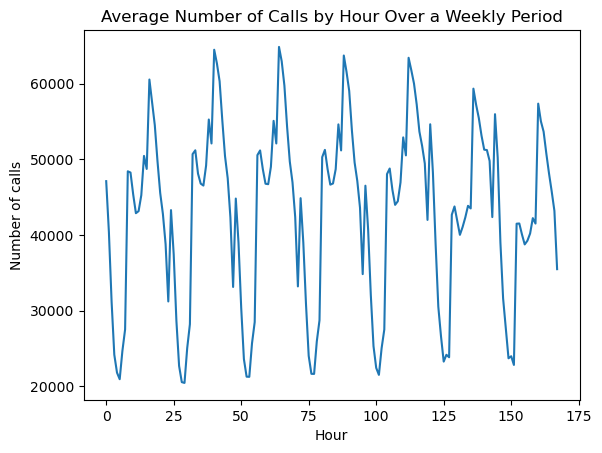

In [141]:
sns.lineplot(data = weekly_hour_counts, x = "index_hour", y = "avg_count")
plt.title("Average Number of Calls by Hour Over a Weekly Period")
plt.xlabel("Hour")
plt.ylabel("Number of calls")
plt.show()

### Filter out individual borough 

Before looking at a time series plot, we need to make sure that each boro has the complete number of hours in a day and days in each year. Since there are some values in the boro column that are labeled as null, we can attempt to label these observations based on the locatoin data that we do have. 

- Plot the missing boro data on a map

#### Inspect missing boroughs

In [146]:
missing_boro.head()

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,typ_desc,cip_jobs,disp_ts,arrivd_ts,closng_ts,location
22540,83975439,2022-03-14,2022-03-14,2025-10-06 21:49:59,0.0,(null),(null),INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,2022-03-14 21:51:41,NaT,2022-03-14 22:04:22,POINT (-73.84557370499994 40.90523966300003)
33884,82304349,2022-01-01,2022-01-01,2025-10-06 21:34:02,0.0,(null),(null),SEE COMPLAINANT: OTHER/INSIDE,Non CIP,2022-01-01 21:34:02,NaT,2022-01-01 23:43:38,POINT (-73.85135834599998 40.910044956000036)
51909,82322385,2022-01-02,2022-01-02,2025-10-06 19:10:11,0.0,(null),(null),INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,2022-01-02 19:10:31,NaT,2022-01-02 19:11:46,POINT (-73.83918134199996 40.89928869700003)
60671,82301821,2022-01-01,2022-01-01,2025-10-06 19:03:57,0.0,(null),(null),INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,2022-01-01 19:04:53,NaT,2022-01-01 20:50:35,POINT (-73.74880619799995 40.611477155000046)
78053,82345217,2022-01-03,2022-01-03,2025-10-06 20:43:48,0.0,(null),(null),SEE COMPLAINANT: OTHER/INSIDE,Non CIP,2022-01-03 20:43:48,NaT,2022-01-03 23:42:41,POINT (-73.72209478499997 40.76406135700006)


In [173]:
import regex as re
coords = []
for location in missing_boro['location'][0:10]:
    long_lat = re.findall(r'-\d*.\d*.\d*.\d*', location)
    print(long_lat)

['-73.84557370499994 40.90523966300003']
['-73.85135834599998 40.910044956000036']
['-73.83918134199996 40.89928869700003']
['-73.74880619799995 40.611477155000046']
['-73.72209478499997 40.76406135700006']
['-73.72933092699998 40.72275067700008']
['-73.72209478499997 40.76406135700006']
['-73.72209478499997 40.76406135700006']
['-73.72685005599999 40.65907408000004']
['-73.72685005599999 40.65907408000004']


In [175]:
import regex as re
coords = []
for location in missing_boro['location']:
    long_lat = re.findall(r'(-\d*.\d*.\d*.\d*)', location)
    
    lg = long_lat[0].split(" ")[0]
    lg_float = float(lg.strip(","))
   
    lt = long_lat[0].split(" ")[1]
    lt_float = float(lt.strip())
    
    lt_lg = (lt_float, lg_float)
    coords.append(lt_lg)

In [177]:
missing_boro["coordinates"] = coords

/var/folders/85/mb8f618d7fg208txtk5n8ddc0000gn/T/ipykernel_14004/4276940263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_boro["coordinates"] = coords


In [178]:
missing_boro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 22540 to 25050861
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   cad_evnt_id         534 non-null    int64          
 1   create_date         534 non-null    datetime64[ns] 
 2   incident_date       534 non-null    datetime64[ns] 
 3   incident_time       534 non-null    datetime64[ns] 
 4   nypd_pct_cd         521 non-null    float64        
 5   boro_nm             534 non-null    object         
 6   patrl_boro_nm       534 non-null    object         
 7   typ_desc            534 non-null    object         
 8   cip_jobs            534 non-null    object         
 9   disp_ts             534 non-null    datetime64[ns] 
 10  arrivd_ts           246 non-null    datetime64[ns] 
 11  closng_ts           534 non-null    object         
 12  location            534 non-null    object         
 13  year                534 non-nul

In [181]:
# import marker class
from folium import Map
from folium import Marker
from folium import Icon

new_york = [40.672154, -73.956052]

m = Map(new_york, tiles = "cartodbpositron")

for row in missing_boro.iterrows():
    Marker(
        location = row[1]["coordinates"],
        popup = row[1]["cad_evnt_id"],
        icon = Icon("red")
    ).add_to(m)
    

m

Most of the observations with missing values were either on the boarders of a NYC and Yonkers up north or Long Island southeast. The majority of these calls were Non-crimes in progress with no arrive time listed possibly indicating that no patrol officers were actually dispatched. 

These observations were dropped in the analysis of the Time Series. 

In [185]:
missing_boro["cip_jobs"].value_counts()

cip_jobs
Non CIP         524
Serious           6
Non Critical      4
Name: count, dtype: int64

In [191]:
missing_boro["year"].value_counts()

year
2023    153
2024    151
2022    142
2025     88
Name: count, dtype: int64

In [195]:
missing_boro["response_time_mins"].describe()

count    246.000000
mean      20.743496
std       52.527069
min        0.000000
25%        0.000000
50%        0.016667
75%       11.716667
max      408.833333
Name: response_time_mins, dtype: float64

#### Filter individual borough

'STATEN ISLAND', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX'

In [148]:
full_call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25164780 entries, 0 to 25164779
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   cad_evnt_id         int64          
 1   create_date         datetime64[ns] 
 2   incident_date       datetime64[ns] 
 3   incident_time       datetime64[ns] 
 4   nypd_pct_cd         float64        
 5   boro_nm             object         
 6   patrl_boro_nm       object         
 7   typ_desc            object         
 8   cip_jobs            object         
 9   disp_ts             datetime64[ns] 
 10  arrivd_ts           datetime64[ns] 
 11  closng_ts           object         
 12  location            object         
 13  year                int32          
 14  response_time       timedelta64[ns]
 15  response_time_mins  float64        
 16  hour                int32          
 17  day                 object         
 18  day_num             int32          
dtypes: datetime64[ns](5

In [152]:
# Convert location data to a unifrom string throughout the data frame
import regex as re
coords = []
for location in full_call_data['location']:
    long_lat = re.findall(r'(-\d*.\d*.\d*.\d*)', location)
    
    lg = long_lat[0].split(" ")[0]
    lg_float = float(lg.strip(","))
   
    lt = long_lat[0].split(" ")[1]
    lt_float = float(lt.strip())
    
    lt_lg = (lt_float, lg_float)
    coords.append(lt_lg)

In [154]:
full_call_data['coordinates'] = coords

In [157]:
full_call_data.sort_values(["incident_date", "incident_time"], ascending = True, inplace = True)

In [159]:
# Create a separate boro dataframe

for boro in ['STATEN ISLAND', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX']:
    boro_df = full_call_data[full_call_data["boro_nm"] == boro]
    boro_df.to_csv(f'/Users/dirkhartog/Desktop/CUNY_MSDS/DATA_698/Data/df_{boro.lower()}.csv', index = False)